In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
#pip install neattext

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 114.7/114.7 kB 1.7 MB/s eta 0:00:00


In [68]:
import neattext.functions as nfx

In [94]:
df = pd.read_csv("raw_data.csv")
df.head(5)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [95]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

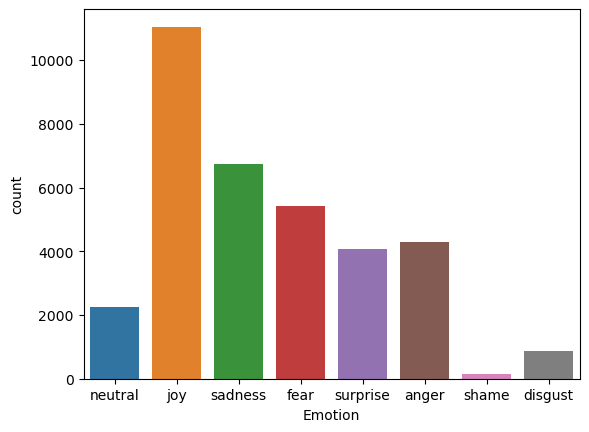

In [96]:
sns.countplot(x='Emotion',data=df)

In [97]:
print(df[df['Emotion'] == 'sadness'])

       Emotion                                               Text
2      sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
6      sadness   .Couldnt wait to see them live. If missing th...
11     sadness            People hide their behind a #fake smile.
15     sadness  Shakuhachi dress $580,  10-22 mm lens $708 #pa...
20     sadness    Oh , that's too bad . Should I call a doctor ? 
...        ...                                                ...
34743  sadness  RIP Patrice O'Neil....the world of funny will ...
34748  sadness  My sister lost one of her twin sons (my first ...
34753  sadness  Sebastian Village is pissing me off I still do...
34767  sadness  The thought that I'll never sit at the school ...
34791  sadness  I think about you baby, and I dream about you ...

[6722 rows x 2 columns]


In [98]:
print(df[df['Emotion'] == 'neutral'])

       Emotion                                               Text
0      neutral                                             Why ? 
61     neutral   My mother-in-law used to do the same thing to...
68     neutral   Well , I didn't think so at first . But as we...
76     neutral                                 Once in a while . 
114    neutral                                              So ? 
...        ...                                                ...
34745  neutral                                        How's it ? 
34750  neutral                                            John . 
34765  neutral                                            Sure . 
34771  neutral                                         Too bad . 
34783  neutral                                         Not yet . 

[2254 rows x 2 columns]


In [99]:
print(df[df['Emotion'] == 'joy'])

      Emotion                                               Text
1         joy    Sage Act upgrade on my to do list for tommorow.
3         joy   Such an eye ! The true hazel eye-and so brill...
4         joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
12        joy  For once in his life , Leopold must have been ...
17        joy    I have a feeling i will fail french #fuckfrench
...       ...                                                ...
34778     joy                 In other news, my mum made EFO.   
34784     joy  ~ As musicas que nois danço com os munitores t...
34785     joy  When I understood that I was admitted to the U...
34786     joy    Tuesday woken up to Oscar and Cornet practice X
34788     joy  The world didnt give it to me..so the world MO...

[11045 rows x 2 columns]


In [100]:
print(df[df['Emotion'] == 'surprise'])

        Emotion                                               Text
7      surprise  maken Tip 2: Stop op een moment dat je het hel...
8      surprise  En dan krijg je ff een cadeautje van een tweep...
9      surprise   @1116am Drummer Boy bij op verzoek van @BiemO...
16     surprise  Haha of course I come home to a different hous...
19     surprise  @JuliaLeader I reeeeeellllyyyyyyy need to tell...
...         ...                                                ...
34742  surprise  @Adele_am au niveau de la robe moi j'en ai vu ...
34760  surprise  The apt is xmas ready. Can't wait for my mom t...
34770  surprise  Ten minutes late to work today (again) and my ...
34780  surprise  why is my paper not finished? oh that's right,...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...

[4062 rows x 2 columns]


In [101]:
df['Emotion'] = df['Emotion'].replace(['neutral'], 'Not Hate Speech')
df['Emotion'] = df['Emotion'].replace(['joy'], 'Not Hate Speech')
df['Emotion'] = df['Emotion'].replace(['sadness'], 'Not Hate Speech')
df['Emotion'] = df['Emotion'].replace(['surprise'], 'Not Hate Speech')

In [102]:
print(df[df['Emotion'] == 'fear'])

      Emotion                                               Text
5        fear  I'm expecting an extremely important phonecall...
13       fear  Against the assault of laughter nothing can st...
22       fear  is a primitive #Instinct that's your friend.It...
24       fear  I was riding with a friend in his car. At a sp...
31       fear  is a friend that you misunderstood but I know ...
...       ...                                                ...
34773    fear  Best thing ive heard all day....RT @RevRunWisd...
34774    fear  If your child is  reassure her something will ...
34781    fear  Tom Shakeshaft , who is 15 , reveals his disma...
34782    fear  @JulieCarney27 world of pain... But, got up,bo...
34790    fear  Youu call it JEALOUSY, I call it of #Losing YO...

[5410 rows x 2 columns]


In [103]:
df['Emotion'] = df['Emotion'].replace(['fear'], 'Not Hate Speech')

In [104]:
print(df[df['Emotion'] == 'shame'])

      Emotion                                               Text
33      shame  Nobody doubted him , or failed to recognise hi...
341     shame  " What 's this , playing infant games still ? ...
610     shame  I also remember being extremely ashamed at som...
746     shame  Jasper reddened and pressed his lip together ,...
1077    shame  Now she was getting increasingly embarrassed a...
...       ...                                                ...
33117   shame  Bob became embarrassed at his own effusiveness...
33560   shame  He grinned unrepentantly , watching her deep b...
33798   shame  The row over the Fayed brothers ' acquisition ...
33967   shame         Sendei was n't ashamed to show his fear . 
34173   shame  Ashamed of having frightened me , he looked at...

[146 rows x 2 columns]


In [105]:
print(df[df['Emotion'] == 'anger'])

      Emotion                                               Text
10      anger  The bull tossed the effigy out of their hands ...
14      anger   With everything , with everybody , with all t...
23      anger                           I have to talk to you ! 
41      anger  When you kill yourself with work and see the n...
44      anger  My parents didn't allow me to go to a social f...
...       ...                                                ...
34762   anger  letting Explosions in the Sky express your pen...
34763   anger       ` You 're angry I 'm here , are n't you ? " 
34775   anger  Iv used my monthly allowance of Internet data ...
34779   anger  Love when i dont beat my highscore in doodleju...
34789   anger                           A man robbed me today . 

[4297 rows x 2 columns]


In [106]:
print(df[df['Emotion'] == 'disgust'])

       Emotion                                               Text
90     disgust  @wt2themax1 I'm sorry my blanket isn't comfort...
134    disgust  It linked the poor performance with the exodus...
197    disgust  ewww she got that nasty ass default like she c...
204    disgust  I understand the mood but if some of them are ...
231    disgust  &quot;was that a period poop? it definitely sm...
...        ...                                                ...
34252  disgust  Ew just stepped on a mammoth size snail while ...
34384  disgust  the awkward moment when an 'ex' calls u 'sis' ...
34396  disgust  “@BarackObama: Tonight, Senate Republicans vot...
34467  disgust              This bus smell like straight FISH !! 
34581  disgust  Those people who eat loads of crappy food all ...

[856 rows x 2 columns]


In [107]:
df['Emotion'] = df['Emotion'].replace(['shame'], 'Hate Speech')
df['Emotion'] = df['Emotion'].replace(['anger'], 'Hate Speech')
df['Emotion'] = df['Emotion'].replace(['disgust'], 'Hate Speech')

In [108]:
df.head(5)

,Emotion,Text
0,Not Hate Speech,Why ?
1,Not Hate Speech,Sage Act upgrade on my to do list for tommorow.
2,Not Hate Speech,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Not Hate Speech,Such an eye ! The true hazel eye-and so brill...
4,Not Hate Speech,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [109]:
data = pd.DataFrame()
data['Emotion'] = df['Emotion']
data['Text'] = df['Text'].apply(nfx.remove_userhandles)

In [110]:
data.head()

,Emotion,Text
0,Not Hate Speech,Why ?
1,Not Hate Speech,Sage Act upgrade on my to do list for tommorow.
2,Not Hate Speech,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Not Hate Speech,Such an eye ! The true hazel eye-and so brill...
4,Not Hate Speech,ugh babe.. hugggzzz for u .! babe naamazed ...


In [111]:
data['Text'] = data['Text'].apply(nfx.remove_stopwords)

In [112]:
data.head()

,Emotion,Text
0,Not Hate Speech,?
1,Not Hate Speech,Sage Act upgrade list tommorow.
2,Not Hate Speech,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,Not Hate Speech,eye ! true hazel eye-and brilliant ! Regular f...
4,Not Hate Speech,ugh babe.. hugggzzz u .! babe naamazed nga ako...


In [113]:
Xfeatures = data['Text']
ylabels = data['Emotion']

In [114]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=50)

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [117]:
pipe_lr.score(x_test,y_test) #accuracy

0.8960528836941943

In [118]:
pipe_lr.classes_

array(['Hate Speech', 'Not Hate Speech'], dtype=object)

In [148]:
temp1 = "you are a good person"
temp2 = "You are a angry bird"
temp3 = ""

In [149]:
pipe_lr.predict([temp1])

array(['Not Hate Speech'], dtype=object)

In [150]:
pipe_lr.predict([temp2])

array(['Hate Speech'], dtype=object)

In [140]:
import joblib #save model

In [151]:
pipeline_file = open("picle_file.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()